# Assignment 1: Air Quality Data Analysis


The data for this analysis was collected from the Vancouver International Airport #2 - Air Monitoring Station located on 49.193333, -123.175659. This station monitors various pollutants, including CO, O3, NO2, and PM2.5, providing valuable insights into the air quality at and around the Vancouver International Airport.

## Table of Contents

1. [Library Import and Data Loading](#library-import-and-data-loading)
2. [Data Cleaning](#data-cleaning)
3. [Understanding Data Structure](#understanding-data-structure)
4. [Statistical Analysis](#statistical-analysis)
    - [Descriptive Statistics](#descriptive-statistics)
    - [Time Series Analysis](#time-series-analysis)
    - [Correlation Analysis](#correlation-analysis)
    - [Distribution Analysis](#distribution-analysis)
    - [Trend Analysis](#trend-analysis)
5. [Air Quality Health Index](#air-quality-index)
6. [Regulatory Comparison](#regulatory-comparison)
7. [Major Emission Sources](#major-emission-sources)
8. [Summary/Conclusion](#summary-conclusion)
9. [References](#references)

## Library Import and Data Loading <a id="library-import-and-data-loading"></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import folium

In [43]:
# loading the Vancouver International Airport #2 dataset

df = pd.read_csv("../data/Vancouver-International-Airport-#2.csv",header=[0, 1])

# header=[0, 1] use for reading the first two rows as the header since 
# the data set has the column name and unit on different rows 

In [44]:
df.head()

,Date,Time,CO,NO,NO2,O3,PM25,SO2,PM10,WSPD_SCLR,WDIR_SCLR,WSPD_VECT,WDIR_VECT,TEMP_MEAN,TEMP_10M,HUMIDITY,RAD_TOTAL,PRECIP_TOTAL,NOx
,Unnamed: 0_level_1,Unnamed: 1_level_1,ppm,ppb,ppb,ppb,ug/m3,ppb,ug/m3,m/s,Deg.,m/s,Deg.,°C,kPa,% RH,W/M**2,mm,ppb
0,12/31/2022,24:00 AM,0.23,2.7,16.7,6.8,5.2,0.2,5.9,1.22,317.8,0.76,284.3,4.4,101.6,99.6,0,0,19.5
1,1/1/2023,1:00 AM,0.29,7.3,22,3.7,8.7,0.3,9,0.95,191.2,0.46,184,4.2,101.7,99.6,0,0,29.3
2,1/1/2023,2:00 AM,0.31,17.5,23.5,1.9,21.4,0.4,12.1,0.97,318.4,0.84,321.6,4,101.8,99.6,0,0,41
3,1/1/2023,3:00 AM,0.29,4.8,19.5,2.3,21.6,0.3,15.1,1.06,10.9,0.81,4.6,4.2,101.8,99.7,0,0,24.3
4,1/1/2023,4:00 AM,0.29,7.3,19,1.5,15.2,0.3,12.1,1.01,221.2,0.69,234.7,4.4,101.9,99.4,0,0,26.3


In [45]:
# joining the column name and unit with underscore
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# Renaming to 'Date' and 'Time' columns
df.rename(columns={'Date_Unnamed: 0_level_1': 'Date', 'Time_Unnamed: 1_level_1': 'Time',"PM25_ug/m3":"PM2.5_ug/m3"}, inplace=True)


In [46]:
df.head()

,Date,Time,CO_ppm,NO_ppb,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,WSPD_SCLR_m/s,WDIR_SCLR_Deg.,WSPD_VECT_m/s,WDIR_VECT_Deg.,TEMP_MEAN_°C,TEMP_10M_kPa,HUMIDITY_% RH,RAD_TOTAL_W/M**2,PRECIP_TOTAL_mm,NOx_ppb
0,12/31/2022,24:00 AM,0.23,2.7,16.7,6.8,5.2,0.2,5.9,1.22,317.8,0.76,284.3,4.4,101.6,99.6,0,0,19.5
1,1/1/2023,1:00 AM,0.29,7.3,22,3.7,8.7,0.3,9,0.95,191.2,0.46,184,4.2,101.7,99.6,0,0,29.3
2,1/1/2023,2:00 AM,0.31,17.5,23.5,1.9,21.4,0.4,12.1,0.97,318.4,0.84,321.6,4,101.8,99.6,0,0,41
3,1/1/2023,3:00 AM,0.29,4.8,19.5,2.3,21.6,0.3,15.1,1.06,10.9,0.81,4.6,4.2,101.8,99.7,0,0,24.3
4,1/1/2023,4:00 AM,0.29,7.3,19,1.5,15.2,0.3,12.1,1.01,221.2,0.69,234.7,4.4,101.9,99.4,0,0,26.3


## Data Cleaning <a id="data-cleaning"></a>

In [47]:
##For this work only the primary pollutants data is require 

main_parameters = ['Date', 'Time','TEMP_MEAN_°C', 'CO_ppm', 
                      'NO2_ppb', 'O3_ppb', 'PM2.5_ug/m3', 
                      'SO2_ppb', 'PM10_ug/m3','NO_ppb','WSPD_VECT_m/s','WDIR_VECT_Deg.']

# Selecting relevant columns
df = df[main_parameters]

df.head(2)

,Date,Time,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.
0,12/31/2022,24:00 AM,4.4,0.23,16.7,6.8,5.2,0.2,5.9,2.7,0.76,284.3
1,1/1/2023,1:00 AM,4.2,0.29,22,3.7,8.7,0.3,9,7.3,0.46,184


In [48]:
df.tail(10)

,Date,Time,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.
8735,12/30/2023,11:00 PM,8.1,0.16,5.8,24.1,2.4,0.2,7.9,0.1,2.38,104.1
8736,12/30/2023,24:00 AM,8,0.16,5.9,24.4,3.2,0.2,7,0.1,2.63,109.2
8737,Minimum,NaN,-6.7,-0.19,0.6,0.3,0,0.1,0,-0.2,0.04,0
8738,Min Date,NaN,2/24/2023 8:00 AM,7/12/2023 10:00 AM,4/1/2023 3:00 PM,12/16/2023 4:00 AM,1/10/2023 4:00 AM,1/10/2023 2:00 AM,1/2/2023 5:00 AM,10/9/2023 24:00 AM,1/22/2023 2:00 PM,4/29/2023 1:00 AM
8739,Maximum,NaN,27.9,1.18,53.6,55,87.4,12.8,197.4,201.2,12.58,359.9
8740,Max Date,NaN,7/15/2023 3:00 PM,10/31/2023 9:00 AM,8/26/2023 11:00 PM,4/29/2023 3:00 PM,11/16/2023 2:00 AM,10/28/2023 1:00 AM,8/2/2023 4:00 PM,10/31/2023 9:00 AM,2/13/2023 9:00 PM,2/16/2023 10:00 AM
8741,Avg,NaN,10.8,0.2,11.7,18.9,5.1,0.4,11.3,7,2.6,159.7
8742,Num,NaN,8730,8499,8629,8678,8645,8675,8519,8632,8730,8730
8743,Data[%],NaN,100,97,99,99,99,99,98,99,100,100
8744,STD,NaN,6.1,0.1,8,12.3,4.3,0.4,7.6,15.4,1.5,92.2


In [49]:
# Remove summary rows
# The dataset from row 8737 contains summary rows that are not needed for analysis.
# With this knowledge and having all the 'Time' values as NaN in those rows,
# we filter the entire dataset by dropping any row with NaN values in the 'Time' column.

df.dropna(inplace=True)

In [50]:
df.head()

,Date,Time,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.
0,12/31/2022,24:00 AM,4.4,0.23,16.7,6.8,5.2,0.2,5.9,2.7,0.76,284.3
1,1/1/2023,1:00 AM,4.2,0.29,22,3.7,8.7,0.3,9,7.3,0.46,184
2,1/1/2023,2:00 AM,4,0.31,23.5,1.9,21.4,0.4,12.1,17.5,0.84,321.6
3,1/1/2023,3:00 AM,4.2,0.29,19.5,2.3,21.6,0.3,15.1,4.8,0.81,4.6
4,1/1/2023,4:00 AM,4.4,0.29,19,1.5,15.2,0.3,12.1,7.3,0.69,234.7


## Understanding Data Structure <a id="understanding-data-structure"></a>

In [9]:
df.head()

,Date,Time,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.
0,12/31/2022,24:00 AM,4.4,0.23,16.7,6.8,5.2,0.2,5.9,2.7,0.76,284.3
1,1/1/2023,1:00 AM,4.2,0.29,22,3.7,8.7,0.3,9,7.3,0.46,184
2,1/1/2023,2:00 AM,4,0.31,23.5,1.9,21.4,0.4,12.1,17.5,0.84,321.6
3,1/1/2023,3:00 AM,4.2,0.29,19.5,2.3,21.6,0.3,15.1,4.8,0.81,4.6
4,1/1/2023,4:00 AM,4.4,0.29,19,1.5,15.2,0.3,12.1,7.3,0.69,234.7


In [10]:
# Changing the date on the first row to January 1 2023
df.iloc[0, 0] = '1/1/2023'

In [11]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8220 entries, 0 to 8736
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            8220 non-null   object
 1   Time            8220 non-null   object
 2   TEMP_MEAN_°C    8220 non-null   object
 3   CO_ppm          8220 non-null   object
 4   NO2_ppb         8220 non-null   object
 5   O3_ppb          8220 non-null   object
 6   PM2.5_ug/m3     8220 non-null   object
 7   SO2_ppb         8220 non-null   object
 8   PM10_ug/m3      8220 non-null   object
 9   NO_ppb          8220 non-null   object
 10  WSPD_VECT_m/s   8220 non-null   object
 11  WDIR_VECT_Deg.  8220 non-null   object
dtypes: object(12)
memory usage: 834.8+ KB


    The data types of each column are currently string however we have datetime and floating point values

In [12]:
def convert_to_24_hour(time_str):
    """_summary_
    Converts a time string to a 24 hour format
    """
    try:
        # Try converting the time as a 12-hour format
        return pd.to_datetime(time_str, format="%I:%M %p").strftime("%H:%M")
    except:
        # If it fails, try converting the time as a 24-hour format
        return pd.to_datetime(time_str, format="%H:%M").strftime("%H:%M")


In [13]:
## converting column that are meant to be numeric values to float values

for col in df.columns:
    if col not in ["Date", "Time"]:
        df[col] = pd.to_numeric(df[col])
        
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].str.replace('24:00 AM', '00:00')

# Applying the convert_to_24_hour function to the dataset
df['Time'] = df['Time'].apply(convert_to_24_hour)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8220 entries, 0 to 8736
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            8220 non-null   datetime64[ns]
 1   Time            8220 non-null   object        
 2   TEMP_MEAN_°C    8220 non-null   float64       
 3   CO_ppm          8220 non-null   float64       
 4   NO2_ppb         8220 non-null   float64       
 5   O3_ppb          8220 non-null   float64       
 6   PM2.5_ug/m3     8220 non-null   float64       
 7   SO2_ppb         8220 non-null   float64       
 8   PM10_ug/m3      8220 non-null   float64       
 9   NO_ppb          8220 non-null   float64       
 10  WSPD_VECT_m/s   8220 non-null   float64       
 11  WDIR_VECT_Deg.  8220 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 834.8+ KB


In [15]:
rows = df.shape[0]
cols = df.shape[1]
print(f"We have {rows} rows and {cols} columns in the cleaned vancouver international airport #2 meteorological station dataset.")

We have 8220 rows and 12 columns in the cleaned vancouver international airport #2 meteorological station dataset.


Practically, negative readings may arise from sensor data due to several issues such as calibration errors, power failures, and sensor limitations. We can address these issues by understanding the behavior of our measured parameters. For instance, it is unlikely for readings of CO, CO2, or similar parameters to be negative. Therefore, we filter out any negative readings as shown below:

In [16]:
# Finding rows where any value is negative
negative_df = df[(df.select_dtypes(include=[float, int]) < 0).any(axis=1)]

negative_df.head()

,Date,Time,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.
674,2023-01-29,02:00,-0.3,0.15,12.5,23.4,2.0,0.4,7.2,0.1,2.00,77.9
675,2023-01-29,03:00,-0.5,0.18,14.7,20.6,1.5,0.3,7.3,0.0,1.14,94.2
676,2023-01-29,04:00,-1.0,0.21,17.2,17.8,1.9,0.3,7.6,0.0,1.52,88.4
677,2023-01-29,05:00,-1.3,0.20,17.1,15.6,1.7,0.3,7.8,0.3,1.26,49.8
678,2023-01-29,06:00,-1.7,0.23,21.5,12.0,1.9,0.3,9.6,0.3,1.00,65.7


In [17]:
# Description 
print(f"We have {negative_df.shape[0]} rows with negative readings")

We have 255 rows with negative readings


255 rows represent a small proportion of our dataset approximately 1.1%, dropping them is unlikely to significantly impact the overall analysis.

In [18]:
# dropping rows where any value is negative

df.drop(negative_df.index,inplace=True)

## Statistical Analysis <a id="statistical-analysis"></a>

### Descriptive Statistics <a id="descriptive-statistics"></a>

In [19]:
df.describe()

,Date,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.
count,7965,7965.000000,7965.000000,7965.000000,7965.000000,7965.00000,7965.000000,7965.000000,7965.000000,7965.000000,7965.000000
mean,2023-07-06 01:15:23.389830656,11.167458,0.203694,11.603478,19.161908,5.12791,0.439573,11.343528,6.945888,2.624203,162.572982
min,2023-01-01 00:00:00,0.000000,0.020000,0.600000,0.300000,0.00000,0.100000,0.000000,0.000000,0.040000,0.000000
25%,2023-04-11 00:00:00,6.300000,0.140000,5.200000,8.900000,2.40000,0.200000,7.200000,0.300000,1.530000,90.500000
50%,2023-07-05 00:00:00,10.600000,0.170000,9.600000,19.500000,4.10000,0.300000,9.900000,1.500000,2.440000,122.600000
75%,2023-09-30 00:00:00,15.800000,0.230000,16.800000,28.600000,6.40000,0.500000,13.500000,5.900000,3.390000,261.800000
max,2023-12-30 00:00:00,27.900000,1.180000,53.600000,55.000000,87.40000,12.800000,197.400000,201.200000,12.580000,359.900000
std,NaN,5.860527,0.105623,7.963532,12.232996,4.37524,0.355961,7.707613,15.384664,1.544653,93.024409


##### The summary statistics of the dataset show 7965 records of air quality measurements. Key observations include mean CO levels at 0.204 ppm and mean NO levels at 7.09 ppb. Notably, NO levels vary widely (std: 15.68 ppb), with maximum readings reaching 201.2 ppb. PM2.5 averages 5.12 µg/m³.

### Time Series Analysis <a id="time-series-analysis"></a>

#### Daily Trend Analysis

In [20]:
#grouping the data by date and taking the mean of the primary poullants
daily_trends = df.groupby('Date').agg({col: 'mean' for col in df.select_dtypes(include=[float, int]).columns}).reset_index().sort_values('Date')

daily_trends.head()

,Date,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.
0,2023-01-01,4.708000,0.266000,16.012000,7.652000,7.736000,0.384000,7.460000,5.652000,1.280800,125.592000
1,2023-01-02,2.239130,0.420870,22.156522,2.917391,6.304348,0.452174,8.300000,29.095652,1.058261,127.417391
2,2023-01-03,3.320833,0.242083,19.245833,10.279167,3.383333,0.295833,6.066667,4.941667,2.453750,80.895833
3,2023-01-04,5.181818,0.200909,16.259091,13.768182,4.022727,0.322727,5.318182,4.586364,2.591364,90.272727
4,2023-01-05,8.479167,0.166667,12.329167,22.020833,2.712500,0.270833,7.620833,1.000000,3.134583,104.466667


In [21]:
# Custom Colors
colors = {
        'blue_color': '#031C33',
        'dark_red': '#8B0000'    
        }

In [22]:
def plot_pollant_trend(sub,data,y_value,unit,monthly_avg_plot =True,x="Date",label=None):
    """
    Summary:
    Plots the trend of a specified pollutant over time (daily with monthly avg).

    Parameters:
    sub (int): The subplot position (1 to 4) in a 2x2 grid.
    data (DataFrame): The data containing the pollutant levels and dates.
    y_value (str): The column name in 'data' representing the pollutant levels.
    unit (str): The unit of the pollutant levels.
    
    Returns:
    None
    """
    label_y = y_value.split("_")[0]
    
    label = f'Daily and Monthly Average {label_y} Trends in 2023' if label is None else label
    plt.subplot(2, 2, sub)
    
    # Plot the daily pollutant trends
    sns.lineplot(x=x, y=y_value, data=data, color=colors["blue_color"], label='Daily Trends')
    
    # Set the title and labels for the plot
    plt.title(f'{label}')
    plt.xlabel('')
    plt.ylabel(f'{label_y} ({unit})')
    
    if monthly_avg_plot:
        # Calculate the monthly average of pollutant
        monthly_avg = data.resample('MS', on='Date').mean().reset_index()

        # Changing the last monthly average to the last day of the month
        monthly_avg.iloc[11,0] = pd.Timestamp('2023-12-31')

        # Plot the monthly average data
        sns.lineplot(x='Date', y=y_value,marker='o', data=monthly_avg, color=colors["dark_red"], linewidth=2, label='Monthly Average')
        plt.legend()
    
    # Add a legend
    

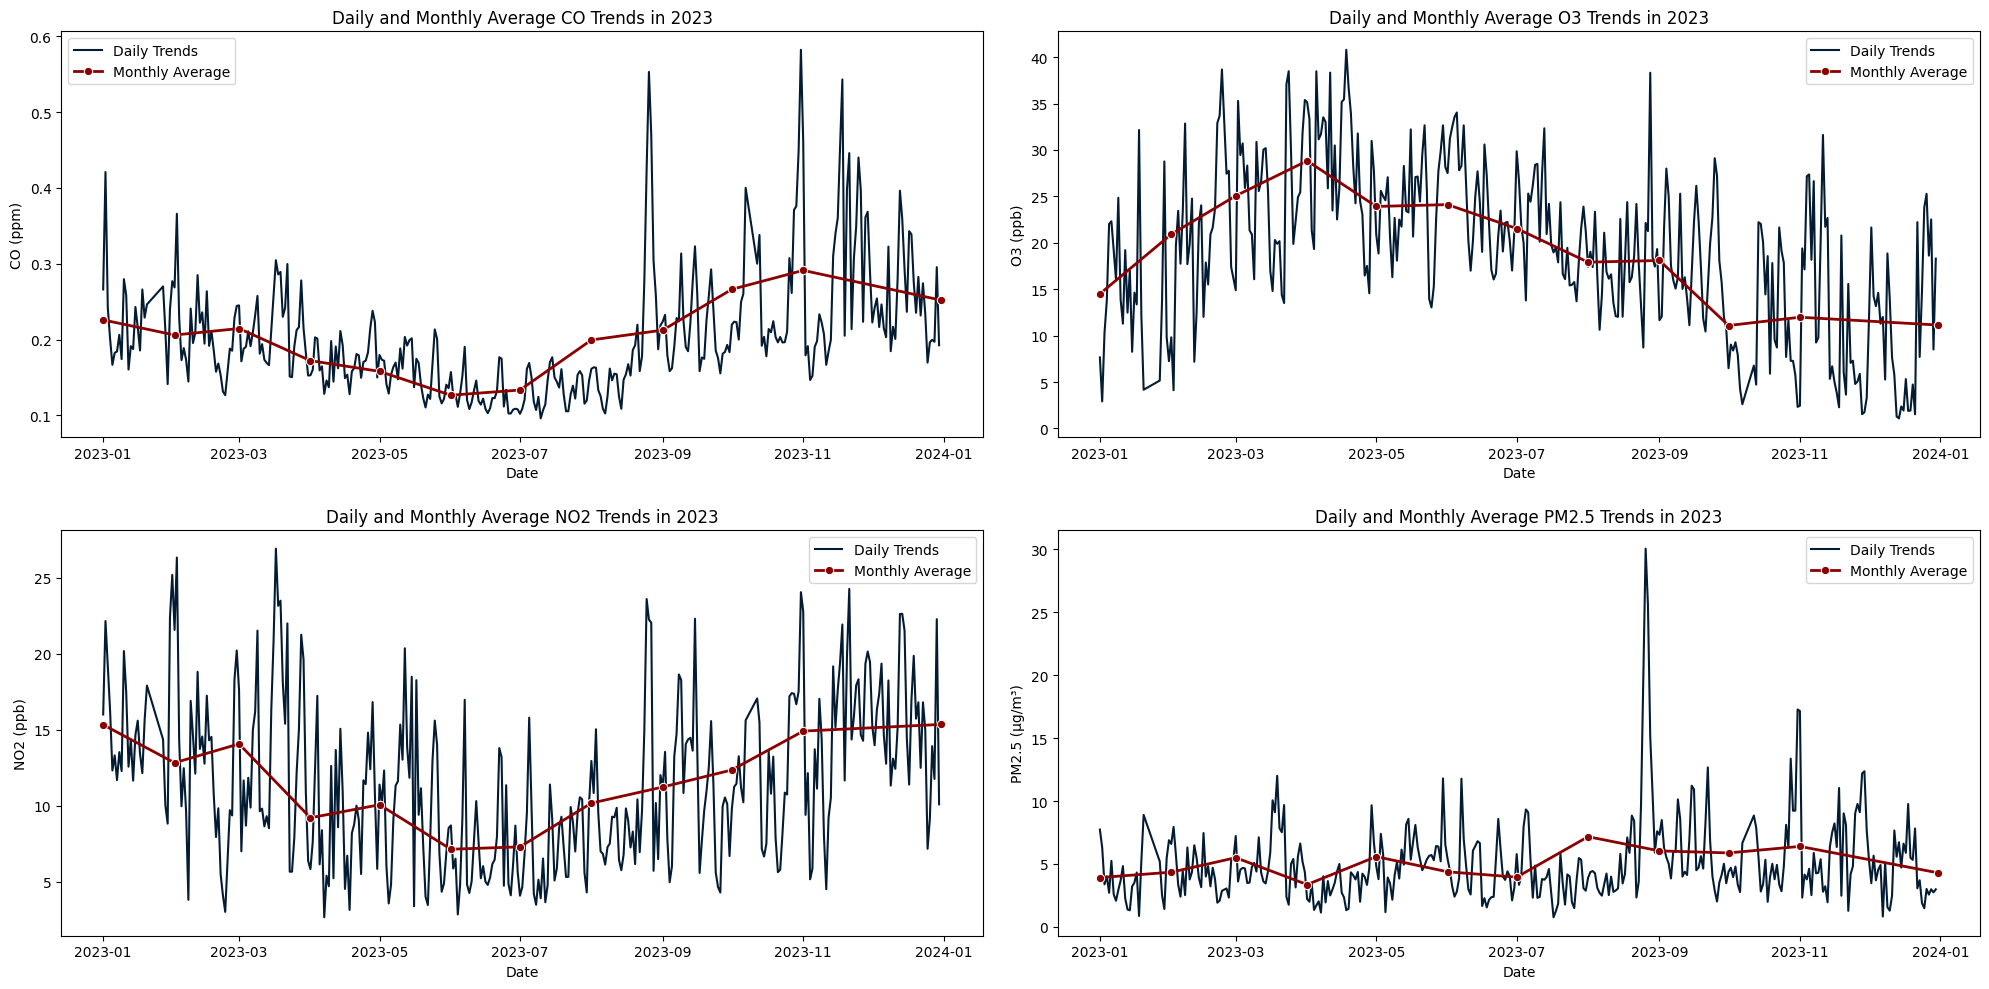

In [23]:
# plot daily trend
plt.figure(figsize=(20, 10))

# Plot CO trends
plot_pollant_trend(1,daily_trends,"CO_ppm","ppm")

# Plot 03 trends
plot_pollant_trend(2,daily_trends,"O3_ppb","ppb")

# Plot NO2 trends
plot_pollant_trend(3,daily_trends,"NO2_ppb","ppb")

# Plot PM2.5 trends
plot_pollant_trend(4,daily_trends,"PM2.5_ug/m3","µg/m³")

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

<a id="time-series"></a>
<!-- Carbon monoxide explanation -->
##### Daily CO Trends
- **Description**: This chart displays the concentration of Carbon Monoxide (CO) in parts per million (ppm) over the months.
- **Observations**:
  - The CO levels starts at a high of **0.23 ppm** in **January** and show a general decreasing trend until **June**.
  - After June, CO levels begin to increase, peaking in **November** of around **0.29 ppm** before slightly dropping towards **December**.
<!-- Ozone explanation -->
##### Daily 03 Trends
- **Description**: This chart displays the concentration of Ozone (O3) in parts per billion (ppb) over the months.
- **Observations**:
  - Ozone levels start low of **13.98 ppb** in **January** and sharply rose, reaching a peak of **28.34 ppb** in **April**.
  - Post-April, there is a gradual decline in O3 levels, hitting a significant low in **October** **10.88 ppb** before remaining farily stable towards the end of the year.
<!-- Nitrogen dioxide explanation -->
##### Daily NO2 Trends
- **Description**: This chart shows the concentration of Nitrogen Dioxide (NO2) in parts per billion (ppb) over the months.
- **Observations**:
  - NO2 levels are high at the start of the year of around 1**5.85 ppb** in **January**, with fluctuations observed until **April**.
  - A downward trend is seen from **April**, reaching the lowest in **June** **7.12 ppb**.
  - After **June**, NO2 levels rises steadily, ending the year at a higher level.
<!-- PM2.5 explanation -->
##### Daily PM2.5 Trends
- **Description**: This chart depicts the concentration of Particulate Matter (PM2.5) in micrograms per cubic meter (µg/m³) over the months.
- **Observations**:
  - PM2.5 levels show significant variation throughout the year. Starting at **3.96 µg/m³** in **January**, the levels peak in **August 7.17 µg/m³**, indicating higher particulate matter concentration.
  - The lowest concentration is observed in April **(3.51 µg/m³)**

#### Summary
The charts illustrate the seasonal and Daily fluctuations in air quality indicators. The patterns reveal periods of elevated and reduced concentrations for each pollutant, indicating potential seasonal influences or diverse emission sources. For example, carbon monoxide (CO) and nitrogen dioxide (NO2) levels typically rise during colder months, possibly due to increased heating activities couple with airport located near by, while ozone (O3) peaks in spring, likely because of photochemical reactions facilitated by greater sunlight exposure. 

### Correlation Analysis <a id="correlation-analysis"></a>

In [24]:
df.head(1)

,Date,Time,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.
0,2023-01-01,00:00,4.4,0.23,16.7,6.8,5.2,0.2,5.9,2.7,0.76,284.3


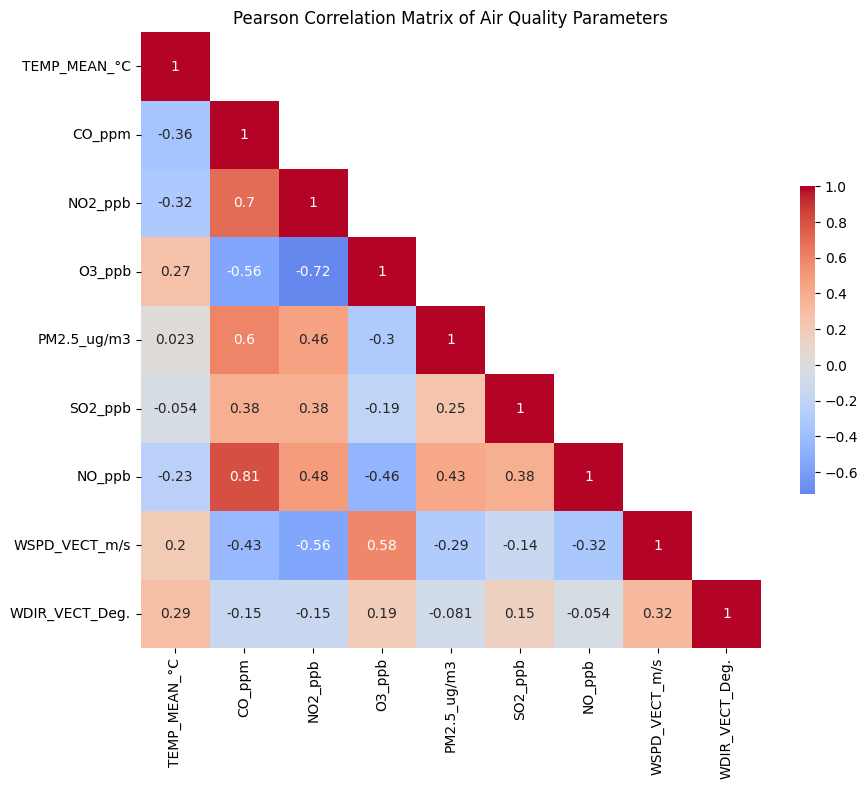

In [25]:
# Selecting numeric variables for correlation analysis
df_corr = df.drop(columns=['Date','Time','PM10_ug/m3'])

# Calculate the Pearson correlation coefficients 
corr_matrix = df_corr.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1)


# Plot the correlation matrix as a heatmap for proper visualization
plt.figure(figsize=(10, 8)) # Chart size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,mask=mask,cbar_kws={"shrink": 0.5}) #plot
plt.title('Pearson Correlation Matrix of Air Quality Parameters')


plt.show()

##### The correlation matrix reveals strong positive correlations between CO, NO, and PM2.5, indicating shared sources or similar emission patterns. In contrast, CO and O3 show a negative correlation, indicating different formation mechanisms. Temperature shows a negative correlation with CO, NO, and PM2.5, and a positive correlation with O3.

### Distribution Analysis <a id="distribution-analysis"></a>

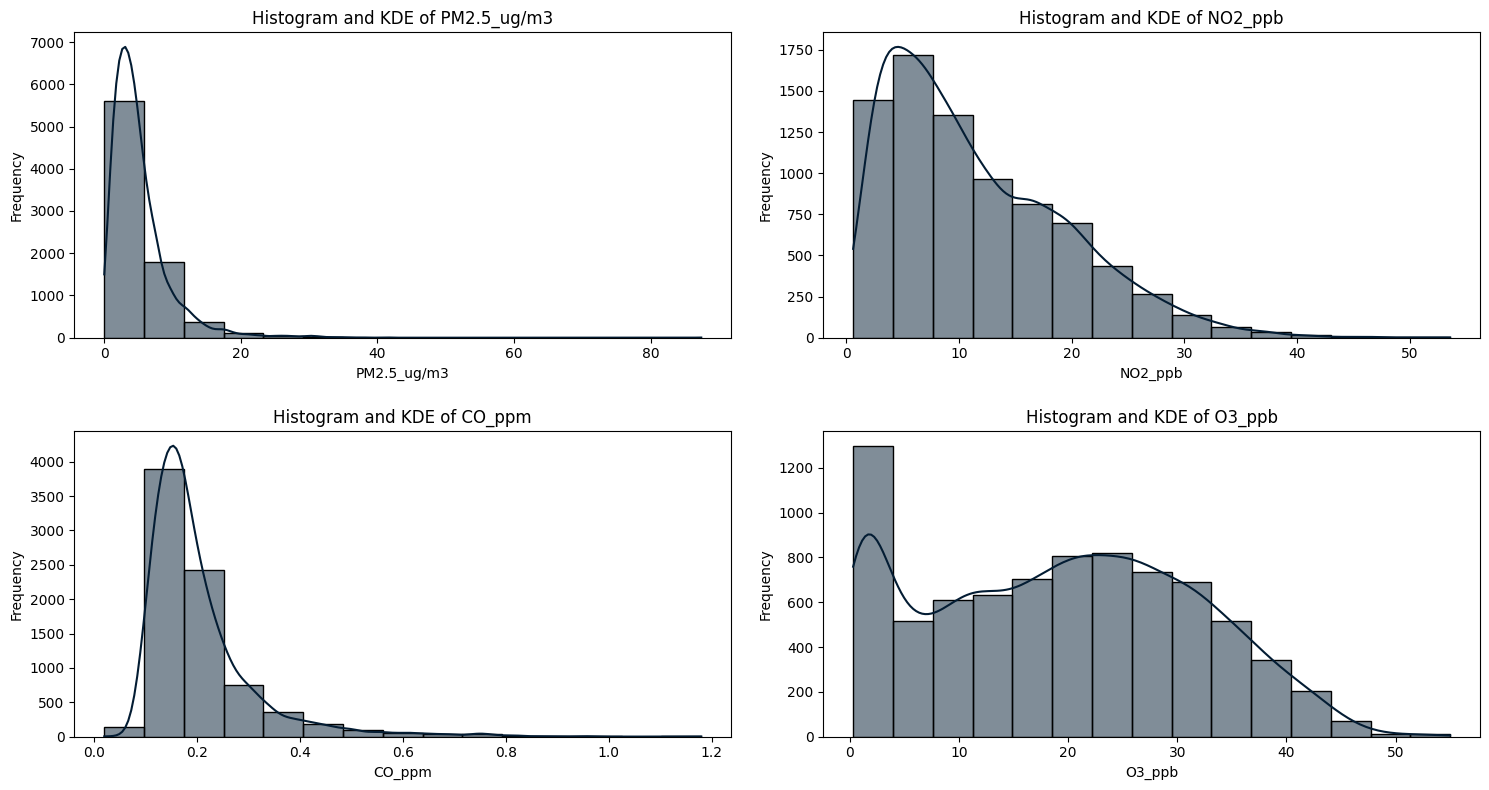

In [26]:
# Selecting numeric variables for distribution analysis
df_dist = df[['PM2.5_ug/m3','NO2_ppb','CO_ppm','O3_ppb']]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms and KDE plots
for i, col in enumerate(df_dist.columns):
    sns.histplot(df_dist[col], kde=True, bins=15, color=colors["blue_color"], ax=axes[i])
    axes[i].set_title(f'Histogram and KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
       
    
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

-   CO (Carbon Monoxide): Concentrations are skewed towards lower values, with most readings below 0.3 ppm.
-   NO2 (Nitrogen Dioxide): Shows a distribution with a peak around 8 ppb, indicating common levels around this value.
-   O3 (Ozone): Shows a relatively spread distribution, with multiple peaks suggesting variability in readings.
-   PM2.5: Concentrations are mostly below 20 µg/m³, with a right-skewed distribution indicating occasional high readings.

## Air Quality Health Index <a id="air-quality-index"></a>

In [27]:
# Various risk thresholds in accordance with Climate change canada
aqhi_colors = {
1: '#00BFFF',  # Low Risk (1-3)
2: '#1b8fb5',
3: '#175e75',
4: '#FFFF00',  # Moderate Risk (4-6)
5: '#FFD700',
6: '#FFA500',
7: '#FF4500',  # High Risk (7-10)
8: '#FF0000',
9: '#B22222',
10: '#8B0000'  
# Very High Risk (10+)
}

def calculate_aqhi(row):
    '''
        Summary: Calculates the air quality of the specified row and assign a color
    '''
    # Pollutants
    PM2_5 = row["PM2.5_ug/m3"]
    O3 = row["O3_ppb"]
    NO2 = row["NO2_ppb"]
    
    # Coefficients
    beta_PM2_5 = 0.000446
    beta_O3 = 0.000537
    beta_NO2 = 0.000104

    # AQHI calculation
    aqhi_PM2_5 = (1000 / 10.4) * (np.exp(beta_PM2_5 * PM2_5) - 1)
    aqhi_O3 = (1000 / 10.4) * (np.exp(beta_O3 * O3) - 1)
    aqhi_NO2 = (1000 / 10.4) * (np.exp(beta_NO2 * NO2) - 1)
   
    aqhi = aqhi_PM2_5 + aqhi_O3 + aqhi_NO2
    
    # Check for aqhi color
    rounded_aqhi = int(np.ceil(aqhi))
    if rounded_aqhi > 10:
        rounded_aqhi = 10
    
    row["color"] = aqhi_colors[rounded_aqhi]
    row["aqhi_general"] = aqhi

    return row

In [28]:
# Applying air quality function to the daily trend data 
daily_trends = daily_trends.apply(lambda row:calculate_aqhi(row),axis=1)

daily_trends.head()

,Date,TEMP_MEAN_°C,CO_ppm,NO2_ppb,O3_ppb,PM2.5_ug/m3,SO2_ppb,PM10_ug/m3,NO_ppb,WSPD_VECT_m/s,WDIR_VECT_Deg.,color,aqhi_general
0,2023-01-01,4.708000,0.266000,16.012000,7.652000,7.736000,0.384000,7.460000,5.652000,1.280800,125.592000,#00BFFF,0.888503
1,2023-01-02,2.239130,0.420870,22.156522,2.917391,6.304348,0.452174,8.300000,29.095652,1.058261,127.417391,#00BFFF,0.643317
2,2023-01-03,3.320833,0.242083,19.245833,10.279167,3.383333,0.295833,6.066667,4.941667,2.453750,80.895833,#00BFFF,0.870082
3,2023-01-04,5.181818,0.200909,16.259091,13.768182,4.022727,0.322727,5.318182,4.586364,2.591364,90.272727,#1b8fb5,1.048946
4,2023-01-05,8.479167,0.166667,12.329167,22.020833,2.712500,0.270833,7.620833,1.000000,3.134583,104.466667,#1b8fb5,1.383552


The above data illustrates the daily trends in AQHI (Air Quality Health Index). A comparison with regulatory standards will be conducted below, referencing guidelines from Environment and Climate Change Canada.

## Regulatory Comparison <a id="regulatory-comparison"></a>

#### Air Quality Health Index (AQHI) and Regulatory Compliance in British Columbia

The Air Quality Health Index (AQHI) is designed to protect public health by offering real-time air quality data and health recommendations. In Canada, Health Canada and Environment and Climate Change Canada work together to oversee the AQHI, monitoring air quality and educating the public about potential health hazards. These regulations are crucial for shielding vulnerable populations from the harmful impacts of air pollution.

The AQHI uses a color-coded system to communicate the level of health risk associated with air quality. According to Environment and Climate Change Canada, the AQHI ranges are as follows ([Canada, 2007](#ref-healthCanda2007)):

- Low Risk (1-3): Colors ranging from light blue to dark blue.
- Moderate Risk (4-6): Yellow to gold and orange.
- High Risk (7-10): Shades of red.
- Very High Risk (10+): Dark red.

In a study published in PLOS ONE, Dunbar et al. discuss the significance of regulatory compliance in health services, emphasizing the mandatory adherence to standards set by regulatory bodies to ensure safety and quality. This compliance often involves inspections and sanctions for non-compliance. Additionally, a systematic review in Health Policy and Planning highlights that effective regulatory frameworks are critical for improving system performance and ensuring compliance through structured governance and regular evaluations ([Pyone et al., 2017](#ref-pyone2017)). These frameworks play a vital role in maintaining air quality standards and protecting public health.

In British Columbia, regulatory limits for key pollutants are set as follows ([Air Quality Objectives & Standards - Province of British Columbia, 2019](#ref-bc-standard2019)):
- PM2.5: The limit is 25 µg/m³ over a 24-hour period, with no 1-hour objective set by the provincial government.
- NO2: The goal is set at 60 parts per billion (ppb) hourly.
- O3 (Ozone): The limit is 62 ppb over an 8-hour period (Environment BC). <br>
These limits help regulate and maintain air quality standards, thereby mitigating the adverse health effects of air pollution on the population.

#### Comparison of pollutants concentration to BC objective

In [29]:
#plot helper function
def plot_pollutant_against_objective(sub,data,objective,pollutant,unit,label,x="Datetime"):
    '''
        Summary: Plots the pollutant trend against the specified objective
    '''
    pollutant_name = pollutant.split('_')[0]
    
# Plot of average 
    plot_pollant_trend(sub,data,pollutant,unit,monthly_avg_plot=False,x=x,label=label)

# Objective line plot
    plt.axhline(objective, linewidth=2, linestyle='--', color=colors["dark_red"])

    plt.ylim(0, objective+10)
    plt.text(daily_trends['Date'].min(), objective+2, f'BC {pollutant_name} Objective', verticalalignment='center')
    plt.legend().set_visible(False)

In [30]:
# Comparison of O3 on 8hours period 
df_03 = df.copy()
df_03['Datetime'] = pd.to_datetime(df_03['Date'].astype(str) + ' ' + df_03['Time'])

# getting 8 hours average
df_03['O3_8hr_avg'] = df_03['O3_ppb'].rolling(window=8, min_periods=8).mean()

df_03 =df_03[df_03['O3_8hr_avg'].notna()] 

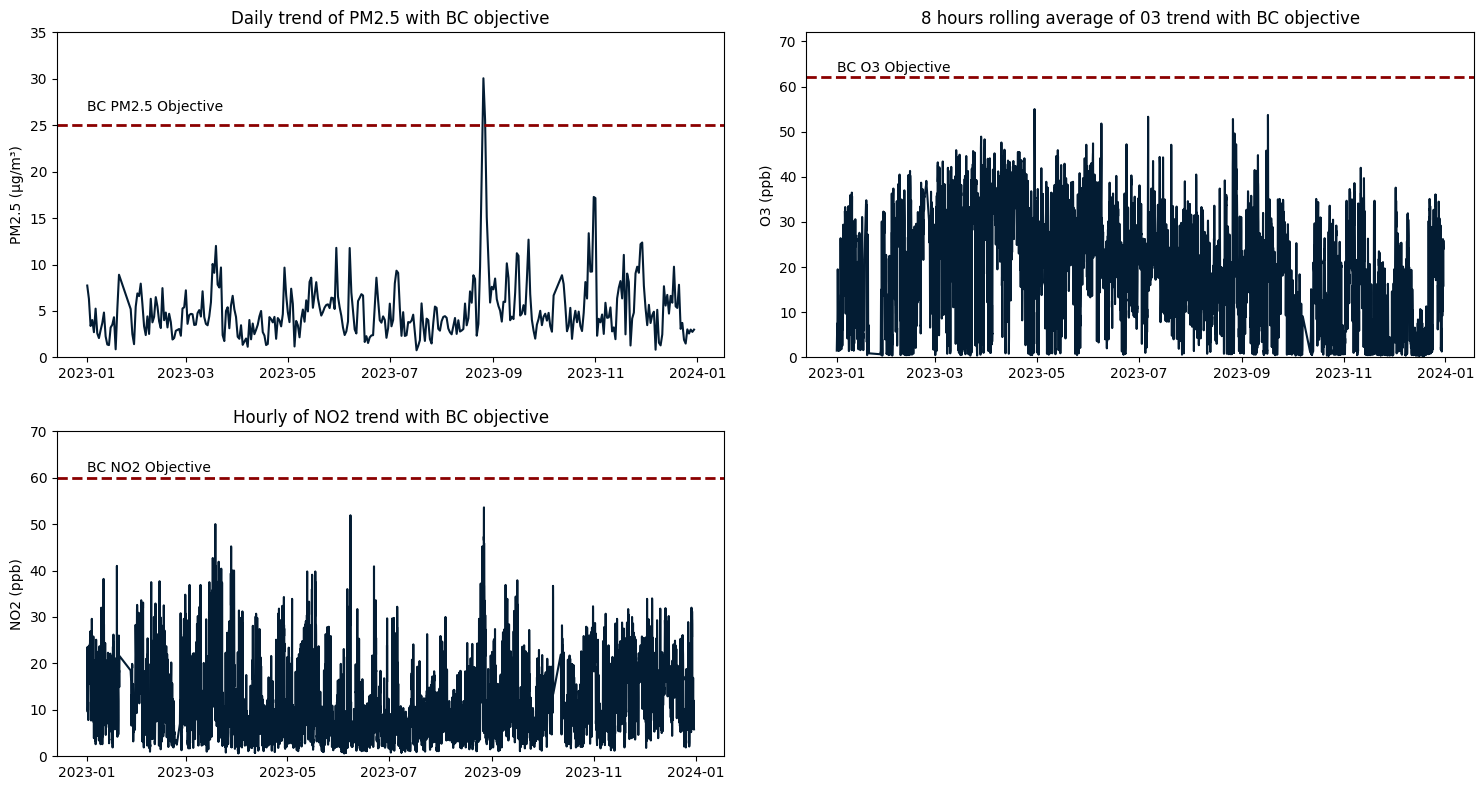

In [31]:
plt.figure(figsize=(15, 8))

# Plot PM2.5 daily trend with BC objective
PM25_objective_BC = 25
title = "Daily trend of PM2.5 with BC objective"
plot_pollutant_against_objective(1,daily_trends,PM25_objective_BC,"PM2.5_ug/m3","µg/m³",title,x='Date')

# Plot O3 trend with BC objective
O3_objective_BC = 62
title = "8 hours rolling average of 03 trend with BC objective"
plot_pollutant_against_objective(2,df_03,O3_objective_BC,'O3_ppb','ppb',title)

# Plot NO2 hourly trend with BC objective
df_no2 = df.copy()
df_no2['Datetime'] = pd.to_datetime(df_no2['Date'].astype(str) +' ' + df_no2['Time'])

NO2_objective_BC = 60
title = "Hourly of NO2 trend with BC objective"
plot_pollutant_against_objective(3,df_no2,NO2_objective_BC,'NO2_ppb','ppb',title)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

The chart provides an analysis of air quality trends in relation to British Columbia's regulatory objectives for PM2.5, O3, and NO2. 
The top left panel indicates daily PM2.5 levels, which generally remain below the BC objective of 25 µg/m³, with occasional spikes exceeding this limit. The top right panel illustrates the 8-hour rolling average of O3 levels, which are below the BC objective of 62 ppb. The bottom panel displays hourly NO2 trends, typically staying below the 60 ppb objective. These visualizations help in identifying periods when pollutant levels exceed regulatory limits, supporting air quality management and public health protection. In future sections, we will explore insight into the occasional spike in PM2.5.

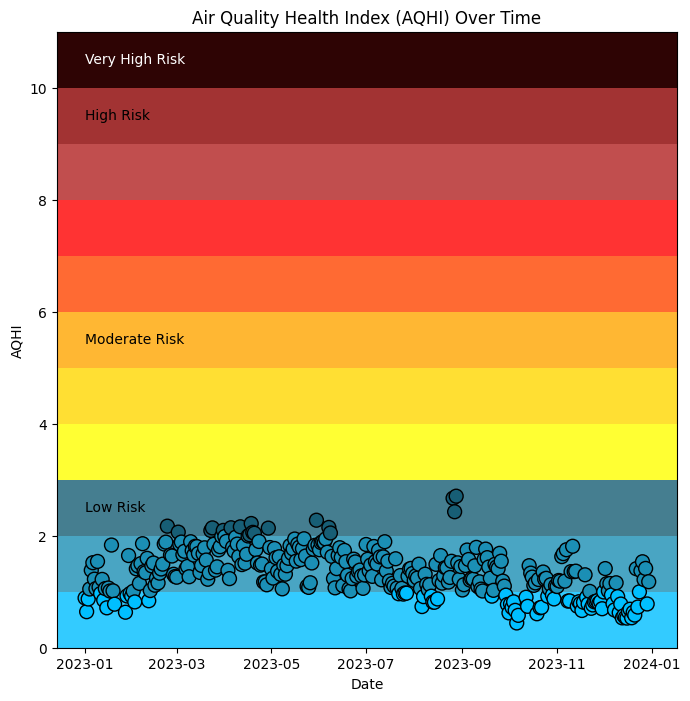

In [32]:
def plot_aqhi_comparison():
    # adding color ranges as specified by Environment and Climate Change Canada
    plt.figure(figsize=(8, 8))
    plt.axhspan(0, 1, facecolor=aqhi_colors[1], alpha=0.8, label='Low Risk')
    plt.axhspan(1, 2, facecolor=aqhi_colors[2], alpha=0.8, label='Low Risk')
    plt.axhspan(2, 3, facecolor=aqhi_colors[3], alpha=0.8, label='Low Risk')
    plt.axhspan(3, 4, facecolor=aqhi_colors[4], alpha=0.8, label='Moderate Risk')
    plt.axhspan(4, 5, facecolor=aqhi_colors[5], alpha=0.8, label='Moderate Risk')
    plt.axhspan(5, 6, facecolor=aqhi_colors[6], alpha=0.8, label='Moderate Risk')
    plt.axhspan(6, 7, facecolor=aqhi_colors[7], alpha=0.8, label='High Risk')
    plt.axhspan(7, 8, facecolor=aqhi_colors[8], alpha=0.8, label='High Risk')
    plt.axhspan(8, 9, facecolor=aqhi_colors[9], alpha=0.8, label='High Risk')
    plt.axhspan(9, 10, facecolor=aqhi_colors[10], alpha=0.8, label='High Risk')
    plt.axhspan(10, 11, facecolor="#2e0404", label='Very High Risk')


# Scatter plot for daily AQHI
    plt.scatter(daily_trends['Date'], daily_trends['aqhi_general'], c=daily_trends['color'], s=100, edgecolor='black')

# Add titles and labels
    plt.title('Air Quality Health Index (AQHI) Over Time')
    plt.xlabel('Date')
    plt.ylabel('AQHI')
    plt.ylim(0, 11)

    plt.text(daily_trends['Date'].min(), 2.5, 'Low Risk', verticalalignment='center')
    plt.text(daily_trends['Date'].min(), 5.5, 'Moderate Risk', verticalalignment='center')
    plt.text(daily_trends['Date'].min(), 9.5, 'High Risk',verticalalignment='center')
    plt.text(daily_trends['Date'].min(), 10.5, 'Very High Risk',verticalalignment='center',color="white")

    plt.show()

plot_aqhi_comparison()

##### The Air Quality Health Index (AQHI) chart displays the variation in air quality over time from January 2023 to December 2023. Each point represents the AQHI value for a specific day, with colors indicating the risk level associated with air quality. Most points cluster around values of 1 to 2, indicating generally low health risk around Vancouver International Airport #2 adhering to the Environment and Climate Change Canada objective for AQHI.

## Major Emission Sources <a id="major-emission-sources"></a>

### Major Emission Sources and Wind Direction in Richmond, BC

Richmond, BC, is a coastal city with significant industrial activity, including the Richmond Plywood Factory and the Richmond Cement Plant. These facilities release pollutants such as particulate matter (PM2.5), nitrogen oxides (NOx), and carbon monoxide (CO), impacting local air quality.

Monthly data from these sources show the following emissions:

Richmond Plywood Factory:
- PM2.5 emissions range from 1.642900 to 2.229650 tons per month.
- NOx emissions range from 5.03370 to 6.83145 tons per month.
- CO emissions range from 10.159800 to 13.788300 tons per month.

Richmond Cement Plant:
- PM2.5 emissions are consistently around 0.871318 to 0.872364 tons per month.
- NOx emissions are consistently around 93.04610 to 93.15780 tons per month.
- CO emissions are consistently around 45.195248 to 45.249504 tons per month.

Wind patterns are crucial in dispersing these pollutants. Richmond generally experiences moderate winds, with prevailing directions changing seasonally. During summer, winds predominantly blow from the west and northwest, bringing cooler marine air and dispersing pollutants away from the city. In winter, winds often come from the east and southeast, associated with frontal systems from the Pacific Ocean.

Understanding these wind patterns is essential for predicting air quality impacts. The Vancouver monitoring station, strategically located at the coast and downwind from major industries during winter months, effectively monitors air quality and assesses the impact of industrial emissions on public health and the environment.


In [33]:
# Prepairng emission sources data

NO2_rate_cement = 1117  # tons/year
pm25_rate_cement = 10.46  # tons/year
CO_rate_cement = 542.56  # tons/year

pm25_rate_plywood = 23.47  # tons/year
NO2_rate_plywood = 71.91  # tons/year
CO_rate_plywood = 145.14  # tons/year


def convert_percent_to_weight(total_weight, per):
    return per / 100 * total_weight


def get_emission_rate():

    Facility = ["Richmond Plywood Factory", "Richmond Cement Plant"]
    months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]

    # PM2.5
    pm25_percent_yearly_plywood = [8.90,8.30,8.30,8.40,8.10,8.80,7.00,9.50,7.60,7.60,9.50,8.00,] # monthly percentage

    pm25_percent_yearly_cement = [8.33,8.33,8.34,8.33,8.33,8.34,8.33,8.33,8.34,8.33,8.33,8.34,]  # monthly percentage

    # NO2
    NO2_percent_year_plywood = [8.90,8.30,8.30,8.40,8.10,8.80,7.00,9.50,7.60,7.60,9.50,8.00,]  # monthly percentage

    NO2_percent_yearly_cement = [8.33,8.33,8.34,8.33,8.33,8.34,8.33,8.33,8.34,8.33,8.33,8.34,]  # monthly percentage

    # CO
    CO_percent_yearly_plywood = [ 8.90, 8.30, 8.30, 8.40, 8.10, 8.80, 7.00, 9.50, 7.60, 7.60, 9.50, 8.00] # monthly percentage
    CO_percent_yearly_cement = [8.33,8.33, 8.34, 8.33, 8.33, 8.34, 8.33, 8.33, 8.34, 8.33, 8.33, 8.34]
    # Calculate PM2.5 and NO2 emissions for each month
    pm25_tons_per_year_plywood = [
        convert_percent_to_weight(pm25_rate_plywood, per)
        for per in pm25_percent_yearly_plywood
    ]
    pm25_tons_per_year_cement = [
        convert_percent_to_weight(pm25_rate_cement, per)
        for per in pm25_percent_yearly_cement
    ]

    NO2_tons_per_year_plywood = [
        convert_percent_to_weight(NO2_rate_plywood, per)
        for per in NO2_percent_year_plywood
    ]
    NO2_tons_per_year_cement = [
        convert_percent_to_weight(NO2_rate_cement, per)
        for per in NO2_percent_yearly_cement
    ]
    
    CO_tons_per_year_cement = [
        convert_percent_to_weight(CO_rate_cement, per)
        for per in CO_percent_yearly_cement
    ]
    
    CO_tons_per_year_plywood = [
        convert_percent_to_weight(CO_rate_plywood, per)
        for per in CO_percent_yearly_plywood
    ]


    # Return Data
    return {
        "facility": [fac for fac in Facility for _ in months],
        "month": months * len(Facility),
        "pm2.5_ton_per_month": pm25_tons_per_year_plywood + pm25_tons_per_year_cement,
        "NO2_ton_per_month": NO2_tons_per_year_plywood + NO2_tons_per_year_cement,
        "CO_ton_per_month": CO_tons_per_year_plywood + CO_tons_per_year_cement,
    }


In [34]:
#emission rate from key facilities in richmond
df_emission_rate = pd.DataFrame(get_emission_rate())

# First five rows
df_emission_rate.head()

,facility,month,pm2.5_ton_per_month,NO2_ton_per_month,CO_ton_per_month
0,Richmond Plywood Factory,Jan,2.08883,6.39999,12.91746
1,Richmond Plywood Factory,Feb,1.94801,5.96853,12.04662
2,Richmond Plywood Factory,Mar,1.94801,5.96853,12.04662
3,Richmond Plywood Factory,Apr,1.97148,6.04044,12.19176
4,Richmond Plywood Factory,May,1.90107,5.82471,11.75634


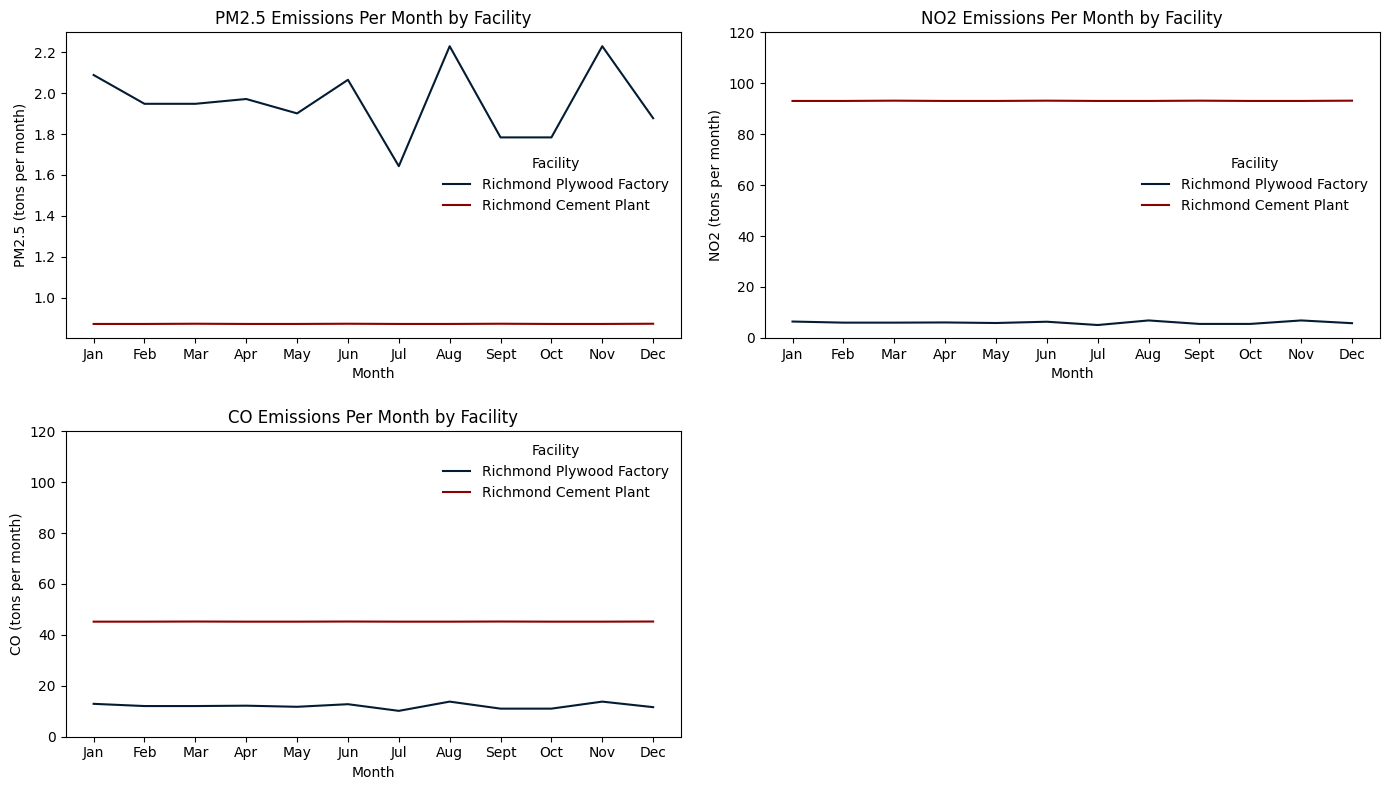

In [35]:
# Plot pm2.5 emissions
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
pm25_plot = sns.lineplot(x='month', y='pm2.5_ton_per_month', hue='facility', data=df_emission_rate,palette=list(colors.values()))
pm25_plot.set_title('PM2.5 Emissions Per Month by Facility')
pm25_plot.set_xlabel('Month')
pm25_plot.set_ylabel('PM2.5 (tons per month)')
plt.legend(title='Facility',frameon=False)

plt.subplot(2, 2, 2)
pm25_plot = sns.lineplot(x='month', y='NO2_ton_per_month', hue='facility', data=df_emission_rate,palette=list(colors.values()))
pm25_plot.set_title('NO2 Emissions Per Month by Facility')
pm25_plot.set_xlabel('Month')
pm25_plot.set_ylabel('NO2 (tons per month)')
plt.ylim(0, 120)
plt.legend(title='Facility',frameon=False)

plt.subplot(2, 2, 3)
pm25_plot = sns.lineplot(x='month', y='CO_ton_per_month', hue='facility', data=df_emission_rate,palette=list(colors.values()))
pm25_plot.set_title('CO Emissions Per Month by Facility')
pm25_plot.set_xlabel('Month')
pm25_plot.set_ylabel('CO (tons per month)')
plt.ylim(0, 120)
plt.legend(title='Facility',frameon=False)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()


The chart displays emissions per month for Richmond Plywood Factory and Richmond Cement Plant. The Richmond Plywood Factory shows fluctuating PM2.5,CO, and NO2 emissions, with notable peaks in August and November. These peaks correspond to higher concentrations measured at the monitoring station, likely due to winter southeast winds bringing pollutants inland and exacerbating air quality issues. In contrast, the Richmond Cement Plant maintains consistent emission throughout the year.

Further examination of the pollutant concentation data from station [Chart](#time-series), particularly on the hour with the high pollutant concentration levels, which is in November, a winter month, reveals a wind direction of 86 - 98.5 degrees, which corresponds to an east-southeast wind. This wind direction supports the hypothesis that pollutants are being transported inland, impacting air quality in the monitored area.

In [36]:
# getting the hour where PM2.4 is Maximum

wind_direction_max_pm = df[df["PM2.5_ug/m3"] == df["PM2.5_ug/m3"].max()]["WDIR_VECT_Deg."]
wind_direction_max_co = df[df["CO_ppm"] == df["CO_ppm"].max()]["WDIR_VECT_Deg."]

print(f"The wind direction for the day with max PM2.5 concentration is: %s" % wind_direction_max_pm.iloc[0])
print(f"The wind direction for the day with max CO concentration is: %s" % wind_direction_max_co.iloc[0])

The wind direction for the day with max PM2.5 concentration is: 98.5
The wind direction for the day with max CO concentration is: 86.0


In [37]:
# Vancouver cooordinates
van_coords = [49.2827, -123.1207]  

map_and_emission_sources = folium.Map(location=van_coords, zoom_start=10,tiles=None,width='90%', height='800px') #general map

# adding dark open street map top map_and_emission_sources
folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}{r}.png',
    name='Dark with Labels',
    attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors & <a href="https://carto.com/attribution">CARTO</a>',
    control=False
).add_to(map_and_emission_sources)

In [38]:
#Reading BC boundaries 
metro_van_boundary = gpd.read_file('../data/Administrative_Boundaries_-967692840885095318.geojson')

# Boundries from metro vancouver shapefile
folium.GeoJson(metro_van_boundary, name='BC Boundary',
               style_function=lambda x: {'fillColor': colors["blue_color"], 'color': "white", 'weight': 2, 'fillOpacity': 0.2},
               ).add_to(map_and_emission_sources)

In [39]:
# point of interest (POI)

poi_data=[
    {
        'location': [49.1934 , -123.1751],
        'popup': 'Vancouver Air Monitoring Station',
        'icon': folium.Icon(color='blue')
    },
    {
        'location': [49.20045,-123.07155],
        'popup': f'''
                <div style="width: 200px; font-size: 14px; line-height: 1.6; padding: 5px; color: #333;">
                    <strong>Facility:</strong> Plywood Factory <br>
                    <strong>PM2.5:</strong> {pm25_rate_plywood} tons/year <br>
                    <strong>NO2:</strong> {NO2_rate_plywood} tons/year <br>
                </div>
                ''',
        'icon': folium.Icon(color='red')
    },
    {
        'location': [49.1591,-123.0032],
        'popup': f'''
                <div style="width: 200px; font-size: 14px; line-height: 1.6; padding: 5px; color: #333;">
                    <strong>Facility:</strong> Cement Factory <br>
                    <strong>PM2.5:</strong> {pm25_rate_cement} tons/year <br>
                    <strong>NO2:</strong> {NO2_rate_cement} tons/year <br>
                </div>
                ''',
        'icon': folium.Icon(color='red')
    }
]


In [40]:
# Add POIs to the map
for poi in poi_data:
    folium.Marker(location=poi['location'], popup=poi['popup'], icon=poi['icon']).add_to(map_and_emission_sources)

In [41]:
map_and_emission_sources

#### spatial context
The map shows the facilities' geographic locations, with the monitoring station indicated by a blue marker for spatial context.

## Summary/Conclusion <a id="summary-conclusion"></a>
This analysis evaluates air quality data from the Vancouver International Airport #2 monitoring station, focusing on pollutants such as CO, NO2, O3, and PM2.5. Thorough data-cleaning procedures were applied to ensure accuracy, and statistical analysis revealed significant trends and correlations among the pollutants. For instance, O3 is positively correlated with temperature, with levels peaking during spring, attributed to photochemical reactions facilitated by greater sunlight exposure. CO, NO2, and PM2.5 show strong correlations with each other. Daily patterns highlighted seasonal variations, with CO and NO2 levels peaking during colder months, likely due to increased heating activities and airport operations, coupled with east-southeast winds blowing pollutants into the city.

Comparing the data against the standards set by Province of British Columbia revealed that pollutant levels generally met acceptable limits. However, occasional spikes in PM2.5 exceeded regulatory thresholds. Spatial analysis identified emission sources with high emission rates during these periods, highlighting the impact of wind patterns on pollutant dispersion. This comprehensive analysis underscores the importance of ongoing air quality monitoring and regulatory compliance to protect public health and effectively manage pollution.

## References <a id="references"></a>

1. Air Quality Objectives & Standards - *Province of British Columbia*. (2019). Gov.bc.ca. https://www2.gov.bc.ca/gov/content/environment/air-land-water/air/air-quality-management/regulatory-framework/objectives-standards
   
2. Canada, Health. (2007). *Air Quality Health Index (AQHI)*. Retrieved from [https://www.canada.ca/en/health-canada/services/air-quality-health-index.html](https://www.canada.ca/en/health-canada/services/air-quality-health-index.html)

3. Dunbar, P., Keyes, L. M., & Browne, J. P. (2023). Determinants of regulatory compliance in health and social care services: A systematic review using the Consolidated Framework for Implementation Research. *PLOS ONE*, 18(4), e0278007. https://doi.org/10.1371/journal.pone.0278007

4. Pyone, T., Smith, H., & van den Broek, N. (2017). Frameworks to assess health systems governance: a systematic review. *Health Policy and Planning*, 32(5), 710–722. https://doi.org/10.1093/heapol/czx007